## 간단한 서로소 집합 알고리즘

In [2]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        return find_parent(parent, parent[x])
    return x

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화하기

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v + 1):
    parent[i] = i

# Union 연산을 각각 수행
for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

# 각 원소가 속한 집합 출력하기
print('각 원소가 속한 집합: ', end='')
for i in range(1, v + 1):
    print(find_parent(parent, i), end=' ')

print()

# 부모 테이블 내용 출력하기
print('부모 테이블: ', end='')
for i in range(1, v + 1):
    print(parent[i], end=' ')


6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합: 1 1 1 1 5 5 
부모 테이블: 1 1 2 1 5 5 

## 개선된 서로소 집합 알고리즘

In [3]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화하기

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v + 1):
    parent[i] = i

# Union 연산을 각각 수행
for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

# 각 원소가 속한 집합 출력하기
print('각 원소가 속한 집합: ', end='')
for i in range(1, v + 1):
    print(find_parent(parent, i), end=' ')

print()

# 부모 테이블 내용 출력하기
print('부모 테이블: ', end='')
for i in range(1, v + 1):
    print(parent[i], end=' ')


6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합: 1 1 1 1 5 5 
부모 테이블: 1 1 1 1 5 5 

## 서로소 집합을 활용한 사이클 판별

In [4]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화하기

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v + 1):
    parent[i] = i

cycle = False # 사이클 발생 여부

for i in range(e):
    a, b = map(int, input().split())
    # 사이클이 발생한 경우 종료
    if find_parent(parent, a) == find_parent(parent, b):
        cycle = True
        break
    # 사이클이 발생하지 않았다면 합집합(Union) 연산 수행
    else:
        union_parent(parent, a, b)

if cycle:
    print("사이클이 발생했습니다.")
else:
    print("사이클이 발생하지 않았습니다.")


3 3
1 2
1 3
2 3
사이클이 발생했습니다.


## 크루스칼 알고리즘

In [5]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(Union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화하기

# 모든 간선을 담을 리스트와, 최종 비용을 담을 변수
edges = []
result = 0

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v + 1):
    parent[i] = i

# 모든 간선에 대한 정보를 입력 받기
for _ in range(e):
    a, b, cost = map(int, input().split())
    # 비용순으로 정렬하기 위해서 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((cost, a, b))

# 간선을 비용순으로 정렬
edges.sort()

# 간선을 하나씩 확인하며
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost

print(result)

7 9
1 2 29
1 5 75
2 3 35
2 6 34
3 4 7
4 6 23
4 7 13
5 6 53
6 7 25
159


## 위상정렬

In [6]:
from collections import deque

# 노드의 개수와 간선의 개수를 입력 받기
v, e = map(int, input().split())
# 모든 노드에 대한 진입차수는 0으로 초기화
indegree = [0] * (v + 1)
# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트 초기화
graph = [[] for i in range(v + 1)]

# 방향 그래프의 모든 간선 정보를 입력 받기
for _ in range(e):
    a, b = map(int, input().split())
    graph[a].append(b) # 정점 A에서 B로 이동 가능
    # 진입 차수를 1 증가
    indegree[b] += 1

# 위상 정렬 함수
def topology_sort():
    result = [] # 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용

    # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
    for i in range(1, v + 1):
        if indegree[i] == 0:
            q.append(i)

    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        result.append(now)
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            indegree[i] -= 1
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)

    # 위상 정렬을 수행한 결과 출력
    for i in result:
        print(i, end=' ')

topology_sort()


7 8
1 2
1 5
2 3
2 6
3 4
4 7
5 6
6 4
1 2 5 3 6 4 7 

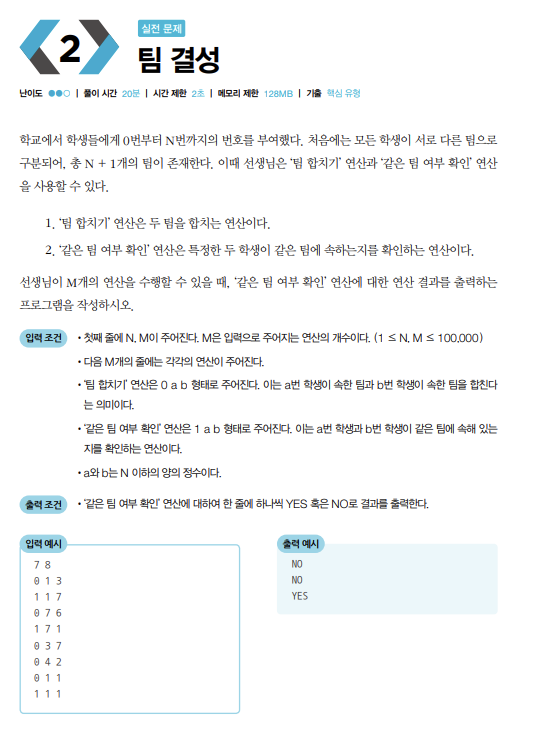

In [8]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

n, m = map(int, input().split())
parent = [0] * (n + 1) # 부모 테이블 초기화

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(0, n + 1):
    parent[i] = i

# 각 연산을 하나씩 확인
for i in range(m):
    oper, a, b = map(int, input().split())
    # 합치합(Union) 연산인 경우
    if oper == 0:
        union_parent(parent, a, b)
    # 찾기(Find) 연산인 경우
    elif oper == 1:
        if find_parent(parent, a) == find_parent(parent, b):
            print('YES')
        else:
            print('NO')


7 8
0 1 3
1 1 7
NO
0 7 6
1 7 1
NO
0 3 7
0 4 2
0 1 1
1 1 1
YES


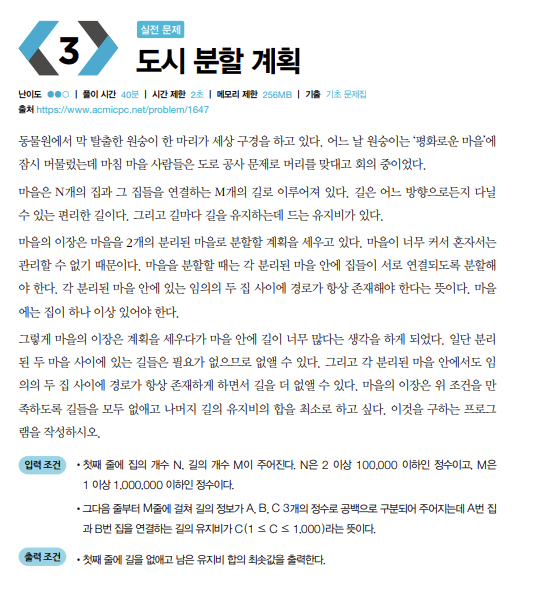

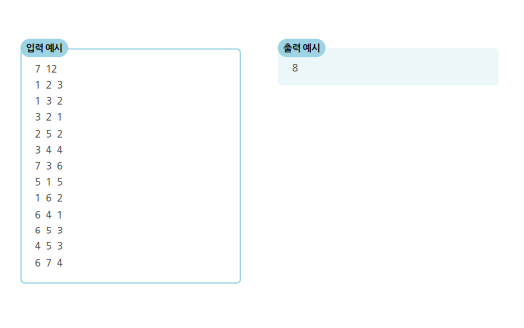

In [9]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(Union 연산)의 개수 입력받기
v, e = map(int, input().split())
parent = [0] * (v + 1) # 부모 테이블 초기화

# 모든 간선을 담을 리스트와, 최종 비용을 담을 변수
edges = []
result = 0

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v + 1):
    parent[i] = i

# 모든 간선에 대한 정보를 입력받기
for _ in range(e):
    a, b, cost = map(int, input().split())
    # 비용순으로 정렬하기 위해서 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((cost, a, b))

# 간선을 비용순으로 정렬
edges.sort()
last = 0 # 최소 신장 트리에 포함되는 간선 중에서 가장 비용이 큰 간선

# 간선을 하나씩 확인하며
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost
        last = cost

print(result - last)


7 12
1 2 3
1 3 2
3 2 1
2 5 2
3 4 4
7 3 6
5 1 5
1 6 2
6 4 1
6 5 3
4 5 3
6 7 4
8


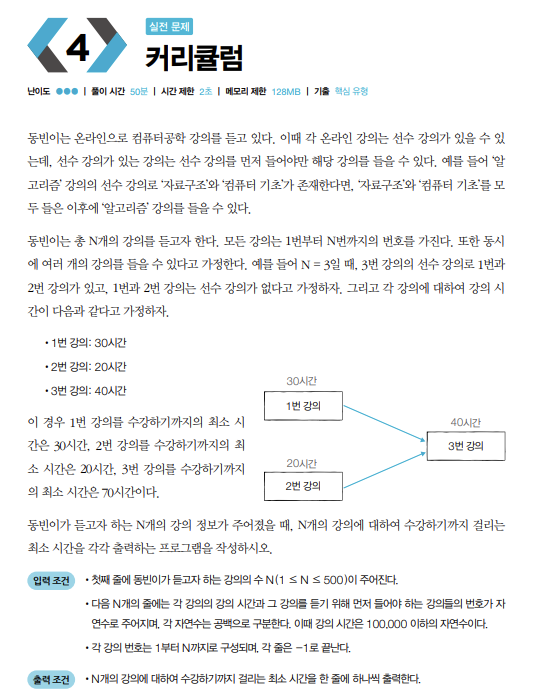

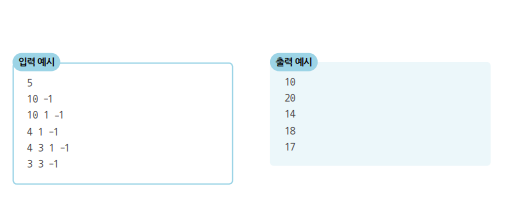

In [10]:
from collections import deque
import copy

# 노드의 개수 입력받기
v = int(input())
# 모든 노드에 대한 진입차수는 0으로 초기화
indegree = [0] * (v + 1)
# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트(그래프) 초기화
graph = [[] for i in range(v + 1)]
# 각 강의 시간을 0으로 초기화
time = [0] * (v + 1)

# 방향 그래프의 모든 간선 정보를 입력받기
for i in range(1, v + 1):
    data = list(map(int, input().split()))
    time[i] = data[0] # 첫 번째 수는 시간 정보를 담고 있음
    for x in data[1:-1]:
        indegree[i] += 1
        graph[x].append(i)

# 위상 정렬 함수
def topology_sort():
    result = copy.deepcopy(time) # 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용

    # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
    for i in range(1, v + 1):
        if indegree[i] == 0:
            q.append(i)

    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            result[i] = max(result[i], result[now] + time[i])
            indegree[i] -= 1
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)

    # 위상 정렬을 수행한 결과 출력
    for i in range(1, v + 1):
        print(result[i])

topology_sort()


5
10 -1
10 1 -1
4 1 -1
4 3 1 -1
3 3 -1
10
20
14
18
17
